# Capstone project: solar radiation forecasting using machine learning and deep learning methodes 

<img src="Solar radiation .jpg" alt="Alt text that describes the graphic" title="Title text" />

solar radiation forecasting 
With an increasing number of installed utility-scale PV plants and a growing need for predictable energy generation, the solar industry has started paying attention to solar forecasting. The reasons behind this are:
1.Solar generation is variable in nature.Cloud cover causes this variability by impeding sunlight from hitting the solar panels.
2.Being able to predict solar output will make the electric grid work better under variable conditions like the variance of prices and costs of othe sources
Essentially, solar forecasting provides a way for grid operators to predict and balance energy generation and consumption. Assuming the grid operator has a mix of generating assets at their disposal, reliable solar forecasting lets that operator best optimize the way they dispatch their controllable units.
In the other hand,Forecasts attempt to predict the future, which likely means they’re wrong more often than right. What happens when a solar forecast is wrong? The effects of incorrect solar forecasts really boil down to adding cost to the energy market.From the grid operator perspective, an inaccurate solar forecast means that they need to make up for unpredicted imbalance with shorter-term sources of power. These short-term sources tend to be costlier on a per unit basis, which also means that the extent of total inaccuracy is important. For instance, the total cost to make up a 10% error on a 20 MW and 100 MW plant will be different. This cost can then be passed through from the grid operator to the market participants.

In this project i used datasets issued from Nasa labs. through its Earth Science research program has long supported satellite systems and research providing data important to the study of climate and climate processes. These data include long-term climatologically averaged estimates of meteorological quantities and surface solar energy fluxes. The goal of the project is builiding a model with the maximum accuracy.


## I.Exploratory data analysis:

The data is stored in a CSV file, so we can use Pandas to import the available data in 'first_model.ipynb'

In [97]:
#Loading Time Series Data¶
pt_1=pd.read_csv('first_solar_point.csv',skiprows=21)
pt_1.head()

,LAT,LON,YEAR,MO,DY,PRECTOT,PS,QV2M,T2M_RANGE,TS,T2MDEW,T2M,WS50M,WS10M,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN
0,47.39291,-124.31319,1981,1,1,0.09,100.62,0.005916,4.18,7.71,6.25,7.63,4.77,3.43,-999.0,-999.0,-999.0
1,47.39291,-124.31319,1981,1,2,0.05,100.53,0.005588,4.92,7.57,5.40,7.28,6.60,4.86,-999.0,-999.0,-999.0
2,47.39291,-124.31319,1981,1,3,0.22,100.78,0.005119,3.78,7.12,4.14,6.70,5.34,4.04,-999.0,-999.0,-999.0
3,47.39291,-124.31319,1981,1,4,0.14,101.39,0.005621,3.20,7.81,5.61,7.98,3.43,2.58,-999.0,-999.0,-999.0
4,47.39291,-124.31319,1981,1,5,0.30,101.01,0.005540,4.09,7.64,5.35,7.48,5.25,3.81,-999.0,-999.0,-999.0


In [35]:
#Now, let's look at the information in our dataset:
pt_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14358 entries, 0 to 14357
Data columns (total 17 columns):
LAT                  14358 non-null float64
LON                  14358 non-null float64
YEAR                 14358 non-null int64
MO                   14358 non-null int64
DY                   14358 non-null int64
PRECTOT              14358 non-null float64
PS                   14358 non-null float64
QV2M                 14358 non-null float64
T2M_RANGE            14358 non-null float64
TS                   14358 non-null float64
T2MDEW               14358 non-null float64
T2M                  14358 non-null float64
WS50M                14358 non-null float64
WS10M                14358 non-null float64
ALLSKY_SFC_LW_DWN    14358 non-null float64
ALLSKY_SFC_SW_DWN    14358 non-null float64
CLRSKY_SFC_SW_DWN    14358 non-null float64
dtypes: float64(14), int64(3)
memory usage: 1.9 MB


In [36]:
#Exploring all features of the dataset 
pt_1.columns

Index(['LAT', 'LON', 'YEAR', 'MO', 'DY', 'PRECTOT', 'PS', 'QV2M', 'T2M_RANGE',
       'TS', 'T2MDEW', 'T2M', 'WS50M', 'WS10M', 'ALLSKY_SFC_LW_DWN',
       'ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_SW_DWN'],
      dtype='object')

Here is the explanation of each variable:
- Value for missing model data cannot be computed or out of model availability range: -999
- Parameter(s): 
- PRECTOT MERRA2 1/2x1/2 Precipitation (mm day-1)
- PS MERRA2 1/2x1/2 Surface Pressure (kPa)
- T2M MERRA2 1/2x1/2 Temperature at 2 Meters (C)
- ALLSKY_SFC_SW_DWN SRB/FLASHFlux 1/2x1/2 All Sky Insolation Incident on a Horizontal Surface (kW-hr/m^2/day)
- WS50M MERRA2 1/2x1/2 Wind Speed at 50 Meters (m/s)
- TS MERRA2 1/2x1/2 Earth Skin Temperature (C)
- KT SRB/FLASHFlux 1/2x1/2 Insolation Clearness Index (dimensionless)
- ALLSKY_SFC_LW_DWN SRB/FLASHFlux 1/2x1/2 Downward Thermal Infrared (Longwave) Radiative Flux (kW-hr/m^2/day)
- WS10M MERRA2 1/2x1/2 Wind Speed at 10 Meters (m/s)
- T2M_MAX MERRA2 1/2x1/2 Maximum Temperature at 2 Meters (C)
- T2M_MIN MERRA2 1/2x1/2 Minimum Temperature at 2 Meters (C)
- QV2M MERRA2 1/2x1/2 Specific Humidity at 2 Meters (kg kg-1)
- CLRSKY_SFC_SW_DWN SRB/FLASHFlux 1/2x1/2 Clear Sky Insolation Incident on a Horizontal Surface (kW-hr/m^2/day)

In [37]:
pt_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14358 entries, 0 to 14357
Data columns (total 17 columns):
LAT                  14358 non-null float64
LON                  14358 non-null float64
YEAR                 14358 non-null int64
MO                   14358 non-null int64
DY                   14358 non-null int64
PRECTOT              14358 non-null float64
PS                   14358 non-null float64
QV2M                 14358 non-null float64
T2M_RANGE            14358 non-null float64
TS                   14358 non-null float64
T2MDEW               14358 non-null float64
T2M                  14358 non-null float64
WS50M                14358 non-null float64
WS10M                14358 non-null float64
ALLSKY_SFC_LW_DWN    14358 non-null float64
ALLSKY_SFC_SW_DWN    14358 non-null float64
CLRSKY_SFC_SW_DWN    14358 non-null float64
dtypes: float64(14), int64(3)
memory usage: 1.9 MB


In [98]:
pt_1[['ALLSKY_SFC_LW_DWN','ALLSKY_SFC_SW_DWN','CLRSKY_SFC_SW_DWN']]

,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN
0,-999.0,-999.0,-999.0
1,-999.0,-999.0,-999.0
2,-999.0,-999.0,-999.0
3,-999.0,-999.0,-999.0
4,-999.0,-999.0,-999.0
...,...,...,...
14353,-999.0,-999.0,-999.0
14354,-999.0,-999.0,-999.0
14355,-999.0,-999.0,-999.0
14356,-999.0,-999.0,-999.0


In [13]:
#Creating the feature Date by concatenating

In [99]:
pt_1.YEAR.astype('str')
pt_1.MO.astype('str')
pt_1.DY.astype('str')
pt_1['Date']=pt_1.YEAR.astype('str')+'/'+pt_1.MO.astype('str')+'/'+pt_1.DY.astype('str')
pt_1.columns

Index(['LAT', 'LON', 'YEAR', 'MO', 'DY', 'PRECTOT', 'PS', 'QV2M', 'T2M_RANGE',
       'TS', 'T2MDEW', 'T2M', 'WS50M', 'WS10M', 'ALLSKY_SFC_LW_DWN',
       'ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_SW_DWN', 'Date'],
      dtype='object')

We need to do two things now:
Make sure that we change the dates in our dataset from "non-null object" to "non-null datetime" (i.e., change the data type of dates). This can be done using the to_datetime() function from Pandas. To make sure Python understands the date correctly, a format argument can be passed as specified in the documentation.
Ensure the date becomes the index.

In [100]:
# Convert Date to a datetime column
pt_1['Date']=pd.to_datetime(pt_1['Date'])
# Set the frequency to 'Daily'


In [101]:
#Checking the date column 
pt_1['Date']

0       1981-01-01
1       1981-01-02
2       1981-01-03
3       1981-01-04
4       1981-01-05
           ...    
14353   2020-04-19
14354   2020-04-20
14355   2020-04-21
14356   2020-04-22
14357   2020-04-23
Name: Date, Length: 14358, dtype: datetime64[ns]

In [41]:
#sorting by dates and check indexes 
pt_1.sort_values('Date').Date.tail(50)

14308   2020-03-05
14309   2020-03-06
14310   2020-03-07
14311   2020-03-08
14312   2020-03-09
14313   2020-03-10
14314   2020-03-11
14315   2020-03-12
14316   2020-03-13
14317   2020-03-14
14318   2020-03-15
14319   2020-03-16
14320   2020-03-17
14321   2020-03-18
14322   2020-03-19
14323   2020-03-20
14324   2020-03-21
14325   2020-03-22
14326   2020-03-23
14327   2020-03-24
14328   2020-03-25
14329   2020-03-26
14330   2020-03-27
14331   2020-03-28
14332   2020-03-29
14333   2020-03-30
14334   2020-03-31
14335   2020-04-01
14336   2020-04-02
14337   2020-04-03
14338   2020-04-04
14339   2020-04-05
14340   2020-04-06
14341   2020-04-07
14342   2020-04-08
14343   2020-04-09
14344   2020-04-10
14345   2020-04-11
14346   2020-04-12
14347   2020-04-13
14348   2020-04-14
14349   2020-04-15
14350   2020-04-16
14351   2020-04-17
14352   2020-04-18
14353   2020-04-19
14354   2020-04-20
14355   2020-04-21
14356   2020-04-22
14357   2020-04-23
Name: Date, dtype: datetime64[ns]

In [102]:
#Slicing the data we will be working on from the whole dataset 
pt_1_timeseries=pt_1[['Date','ALLSKY_SFC_LW_DWN','ALLSKY_SFC_SW_DWN','CLRSKY_SFC_SW_DWN']]

In [ ]:
#Checking non values 

In [31]:
pt_1_timeseries.isna().sum()

Date                 0
ALLSKY_SFC_LW_DWN    0
ALLSKY_SFC_SW_DWN    0
CLRSKY_SFC_SW_DWN    0
dtype: int64

In [43]:
#Counting the values and checking anomalies 

In [33]:
pt_1_timeseries.ALLSKY_SFC_LW_DWN.value_counts()

-999.00    919
 7.65      107
 7.44      105
 7.83       99
 7.91       97
          ... 
 5.59        1
 5.55        1
 5.71        1
 5.37        1
 5.09        1
Name: ALLSKY_SFC_LW_DWN, Length: 398, dtype: int64

In [25]:
pt_1_timeseries.tail()

,Date,ALLSKY_SFC_LW_DWN
14353,2020-04-19,-999.0
14354,2020-04-20,-999.0
14355,2020-04-21,-999.0
14356,2020-04-22,-999.0
14357,2020-04-23,-999.0


In [103]:
#Ensure the date becomes the index.
pt_1_timeseries.set_index('Date',inplace=True)

In [11]:
#pt_1_timeseries_month=pt_1_timeseries.resample('MS')

In [12]:
#down_sampling
#pt_1_timeseries_month_mean=pt_1_timeseries.resample('MS').mean()

In [ ]:
#up_sampling
#pt_1_times_12h=pt_1_timeseries.resample('12H').ffill()

In [45]:
#-999.0 refers to Na from the documentation in the website:https://power.larc.nasa.gov/docs/methodology/solar/insolation/
pt_1_timeseries.loc[pt_1_timeseries['ALLSKY_SFC_LW_DWN']==-999,:]

,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN
Date,,,
1981/1/1,-999.0,-999.0,-999.0
1981/1/2,-999.0,-999.0,-999.0
1981/1/3,-999.0,-999.0,-999.0
1981/1/4,-999.0,-999.0,-999.0
1981/1/5,-999.0,-999.0,-999.0
...,...,...,...
2020/4/19,-999.0,-999.0,-999.0
2020/4/20,-999.0,-999.0,-999.0
2020/4/21,-999.0,-999.0,-999.0


In [104]:
#replacing the -999,0 with nan, it's going be easier for the coming steps of prepocessing to have Nan instead of -999,00
import numpy as np
pt_1_timeseries.loc[pt_1_timeseries['ALLSKY_SFC_LW_DWN']==-999,:]= np.nan

/Users/yasserelhari/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [111]:
#Check on the change to Nan
pt_1_timeseries.ALLSKY_SFC_LW_DWN.value_counts(dropna= False)

7.65    107
7.44    105
7.83     99
7.91     97
7.73     96
       ... 
5.36      1
5.40      1
5.51      1
5.56      1
5.09      1
Name: ALLSKY_SFC_LW_DWN, Length: 397, dtype: int64

In [59]:
#size of timeseries 
pt_1_timeseries.loc[pt_1_timeseries['ALLSKY_SFC_LW_DWN']==np.nan,:]

,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN
Date,,,


In [116]:
pt_1_timeseries.loc[pt_1_timeseries['ALLSKY_SFC_SW_DWN']==-999,:]= np.nan

/Users/yasserelhari/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/yasserelhari/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [117]:
pt_1_timeseries.loc[pt_1_timeseries['CLRSKY_SFC_SW_DWN']==-999,:]= np.nan

/Users/yasserelhari/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


As you can see, these new timestamps all have missing values in the resulting data. One of the common ways around this is to fill the current missing value with a previous valid one or with a following valid one . To do this, you can use the .ffill() method as shown below:

In [118]:
pt_1_timeseries.ffill(inplace=True)

/Users/yasserelhari/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [115]:
pt_1_timeseries.tail()

,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN
Date,,,
2020-04-12,5.89,6.49,6.54
2020-04-13,6.28,6.43,6.57
2020-04-14,7.78,4.46,6.33
2020-04-15,7.77,4.66,-999.00
2020-04-16,7.08,6.29,6.68


In [126]:
pt_1_timeseries.shape

(13440, 3)

In [127]:
(pd.Series(pt_1_timeseries.index== pd.date_range('1983-07-01','2020-04-16')).value_counts())== pt_1_timeseries.shape[0]

True    13440
dtype: int64

In [11]:
pt_1_timeseries[pt_1_timeseries['ALLSKY_SFC_LW_DWN']==8.49].head(914)

,ALLSKY_SFC_LW_DWN
Date,
1981-01-01,8.49
1981-01-02,8.49
1981-01-03,8.49
1981-01-04,8.49
1981-01-05,8.49
...,...
1983-06-29,8.49
1983-06-30,8.49
1983-07-01,8.49


In [119]:
#filling NaN with the following valid values 
pt_1_timeseries.bfill(inplace=True)

In [108]:
# drop the dates that have same value continuously that was result of backfilling so we don't have a straight line that would represent originally  NaN
pt_1_timeseries.drop(pd.date_range('1981-01-01','1983-06-30'),inplace=True)
pt_1_timeseries.drop(pd.date_range('2020-04-17','2020-04-23'),inplace=True)

In [135]:
#Check NaN before moving forward
pt_1_timeseries.isna().sum()

ALLSKY_SFC_LW_DWN    0
ALLSKY_SFC_SW_DWN    0
CLRSKY_SFC_SW_DWN    0
dtype: int64

In this case, there is no missing data. When data are missing, they can be handled in a multitude of ways:

Drop the data elements with missing values (this may result in low accuracy and loss of valuable information)
Fill in the missing values under a defined criteria
Use advanced machine learning methods to predict the missing values
In general, the .fillna() method can be used along with methods like .bfill() of .ffill() as an argument/criterion for filling in missing values . .bfill() (backward filling) looks for the next valid entry in the time series and fills the gaps with this value. Similarly, .ffill() can be used to copy forward the previous valid entry of the time series (as demonstrated above).

## II.Visualizing time series data

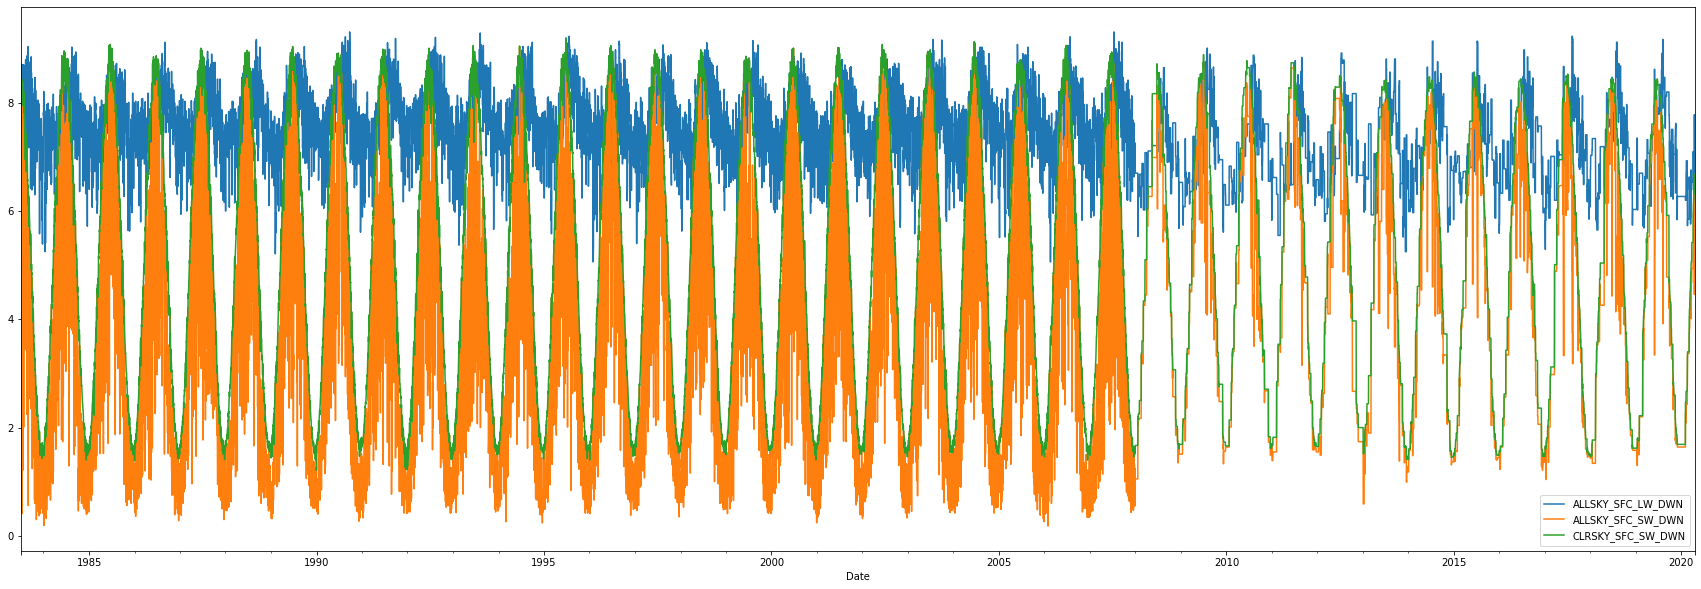

In [121]:
#visualizingtimeseriesdata
#timeseries line plot
import matplotlib.pyplot as plt
%matplotlib inline
pt_1_timeseries.plot(figsize=(30,10))
#pt_1_timeseries.index

we can change the continuous line to dots, each representing one entry in the time series. This can be achieved by changing the `style` parameter of the line plot. Let's pass `style='.b'` as an argument to `.plot()` method.

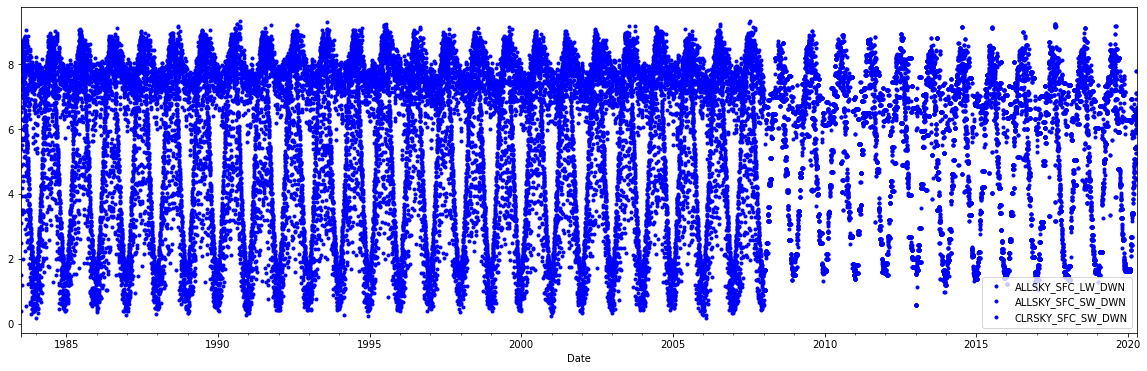

In [138]:
#Draw a dot plot using temp and .plot() method 
pt_1_timeseries.plot(figsize = (20,6), style = '.b')

Grouping and Visualizing Time Series Data:
Now, we'll look at how a time series can be regrouped for a given time interval, i.e. weekly/monthly/yearly average values and compare them to identify any changes taking place over time. We'll use the Pandas' grouper() function in conjunction with the .groupby() method to achieve this.

In [166]:
# Use pandas grouper to group values using annual frequency
year_groups = pt_1_timeseries['1985':'2019'].groupby(pd.Grouper(freq ='D'))

In [156]:
pt_1_timeseries['1985':'2019']

,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN
Date,,,
1985-01-01,7.68,1.29,1.69
1985-01-02,6.62,1.65,1.65
1985-01-03,6.40,1.62,1.63
1985-01-04,7.63,0.92,1.74
1985-01-05,7.76,0.88,1.77
...,...,...,...
2019-12-27,6.27,1.64,1.69
2019-12-28,6.27,1.64,1.69
2019-12-29,6.27,1.64,1.69


In [152]:
pd.Grouper(freq='A')

TimeGrouper(freq=<YearEnd: month=12>, axis=0, sort=True, closed='right', label='right', how='mean', convention='e', base=0)

yr, group in year_groups

In [169]:
# Create a new DataFrame and store yearly values in columns 
pt_1_timeseries_annual = pd.DataFrame()

for yr, group in year_groups:
    pt_1_timeseries_annual[yr.year] = group.values.ravel()
    pt_1_timeseries_annual[yr.year].plot(figsize = (20,15), subplots=True, legend=True)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x12b8c1d40> (for post_execute):


KeyboardInterrupt: 

In [ ]:
    
# Plot the yearly groups as subplots
pt_1_timeseries_annual.plot(figsize = (20,15), subplots=False, legend=True)

In [ ]:
#Time Series Histogram and Density Plots

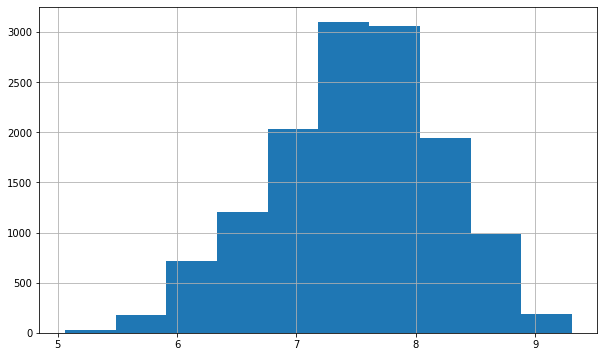

In [170]:
pt_1_timeseries['ALLSKY_SFC_LW_DWN'].hist(figsize = (10,6))

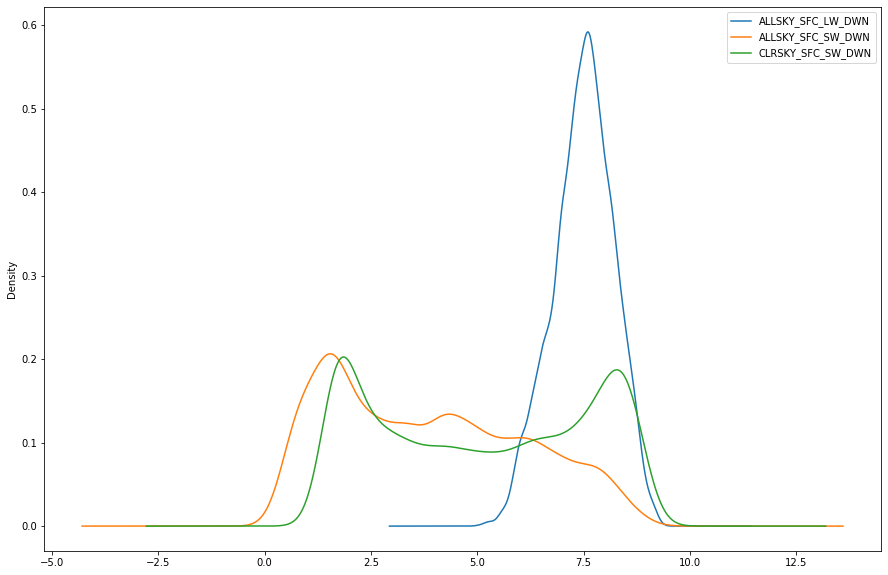

In [172]:
#Plot a density plot for nyse dataset
pt_1_timeseries.plot(kind='kde', figsize = (15,10))

In [176]:
#so we are going to focus on All sky feature since it's the only one distributed normally
pt_1_timeseries_ASK=pt_1_timeseries['ALLSKY_SFC_LW_DWN']

Time series box and whisker plots by year
Histograms and density plots provide insight into the distribution of all observations, but we may be interested in the distribution of values by time interval.
Another type of plot that is useful to summarize the distribution of observations is the box and whisker plot. This plot draws a box around the 25th and 75th percentiles of the data that captures the middle 50% of observations. A line is drawn at the 50th percentile (the median) and whiskers are drawn above and below the box to summarize the general extent of the observations. Dots are drawn for outliers outside the whiskers or extent of the data.

In [ ]:
# Generate a box and whiskers plot for nyse_annual
pt_1_timeseries_annual['ALLSKY_SFC_LW_DWN'].A.boxplot(figsize = (12,7))

In [179]:
pt_1_timeseries_ASK

Date
1983-07-01    8.49
1983-07-02    8.15
1983-07-03    8.33
1983-07-04    8.34
1983-07-05    8.03
              ... 
2020-04-12    5.89
2020-04-13    6.28
2020-04-14    7.78
2020-04-15    7.78
2020-04-16    7.08
Name: ALLSKY_SFC_LW_DWN, Length: 13440, dtype: float64

## First stage:

In [ ]:
#ts_log = pd.DataFrame(data=pt_1_timeseries.values, index=pd.date_range(start=datetime('1983-01,07'), end = datetime('2020,04,16'), freq='D'), columns=['radiation'])

In [182]:
#Ensure the frequency to daily
pt_1_timeseries_ASK=pt_1_timeseries_ASK.asfreq('D')

In [183]:
pt_1_timeseries.index

DatetimeIndex(['1983-07-01', '1983-07-02', '1983-07-03', '1983-07-04',
               '1983-07-05', '1983-07-06', '1983-07-07', '1983-07-08',
               '1983-07-09', '1983-07-10',
               ...
               '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10',
               '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14',
               '2020-04-15', '2020-04-16'],
              dtype='datetime64[ns]', name='Date', length=13440, freq=None)

In [184]:
# Import and apply seasonal_decompose()
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(pt_1_timeseries,freq=365)

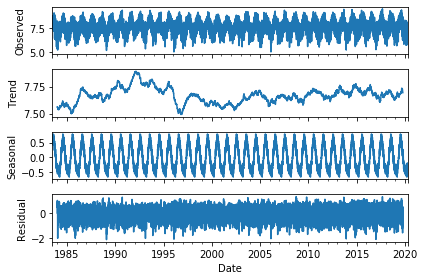

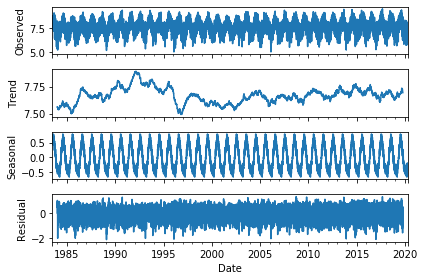

In [29]:
decomposition.plot()

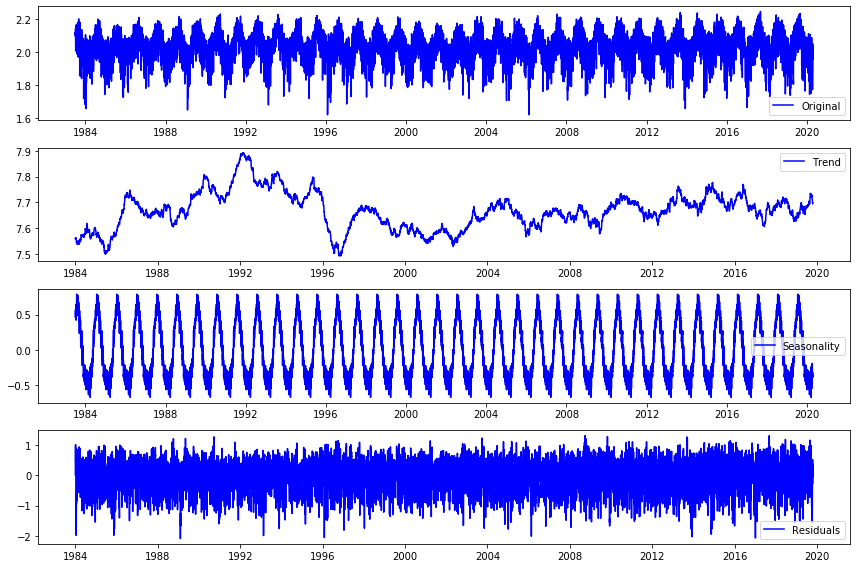

In [30]:
# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(pt_1_timeseries), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

In [186]:
#Calculating the mean
pt_1_timeseries_ASK.mean()

7.493579613095217

In [ ]:
#Practices of rolling data with different windows FOR FURTHER EXPLORATION

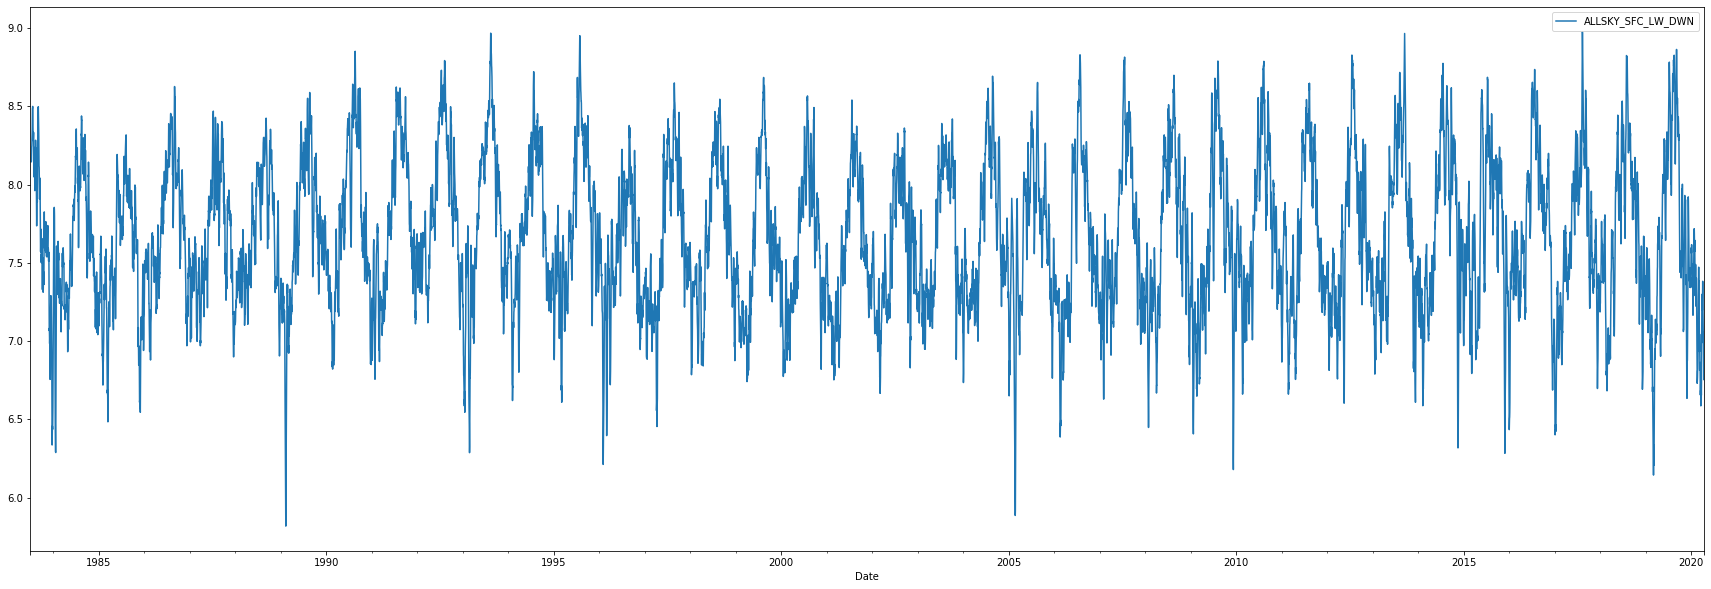

In [41]:
pt_1_timeseries.rolling(window=10,center=False).mean().plot(figsize=(30,10))

In [94]:
pt_1_timeseries.rolling(window=10,center=True).mean().head(10)

,ALLSKY_SFC_LW_DWN
Date,
1983-07-01,NaN
1983-07-02,NaN
1983-07-03,NaN
1983-07-04,NaN
1983-07-05,NaN
1983-07-06,8.146
1983-07-07,8.155
1983-07-08,8.202
1983-07-09,8.240


In [ ]:
The mean is changing over time we confirm that the timeseries is not stationnary 

In [32]:
#the dicker fuller test 
from statsmodels.tsa.stattools import adfuller

In [39]:
pt_1_timeseries[0:5]

,ALLSKY_SFC_LW_DWN
Date,
2015-01-01,5.15
2015-02-01,5.38
2015-03-01,5.69
2015-04-01,6.30
2015-05-01,6.54


## III.Checking stationarity

In [188]:
import statsmodels.tsa.stattools
statsmodels.tsa.stattools.adfuller(pt_1_timeseries_ASK)

(-8.657118936897222,
 4.9345452782670156e-14,
 26,
 13413,
 {'1%': -3.430837627817339,
  '5%': -2.86175550852803,
  '10%': -2.566884710312659},
 13632.66119447256)

In [191]:
#The P-value so small that we Can reject the null hypothesis.

Although Time series modeling require stationarity assumption only few practical times series are stationry. We will try to make a times series stationary even if in reality it is really hard to get a ts perfectly stationary

In [ ]:
here are two major reasons behind non-stationarity of a time series:
Trend: Varying mean over time
Seasonality: Certain variations at specific time-frames

In [ ]:
#modeling the trend and seasonality
Log Transformation: the advantage of taking a log transformation is that the higher values got more penalised than the lower ones.

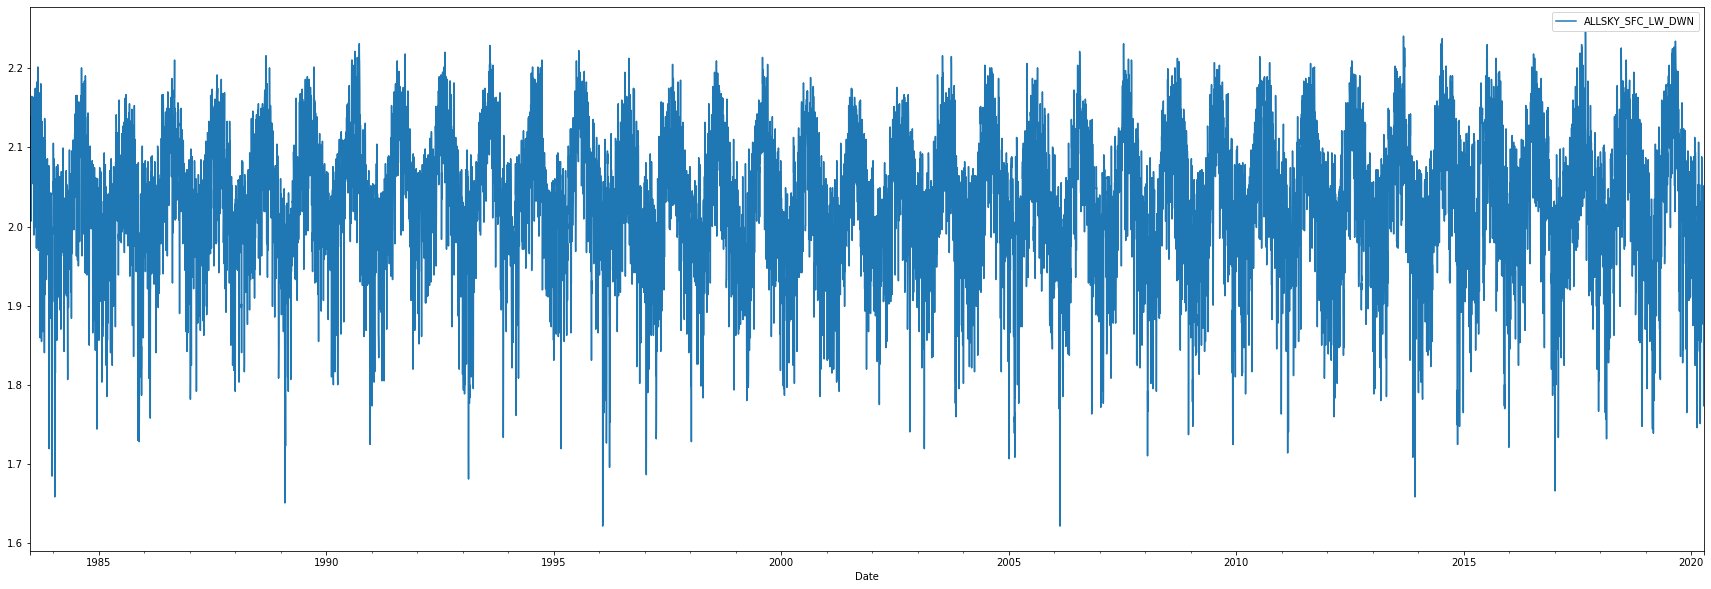

In [49]:
import numpy as np
np.log(pt_1_timeseries).plot(figsize=(30,10))

In [195]:
#subtracting the rolling mean 
roll_mean=pt_1_timeseries.rolling(window=100).mean()

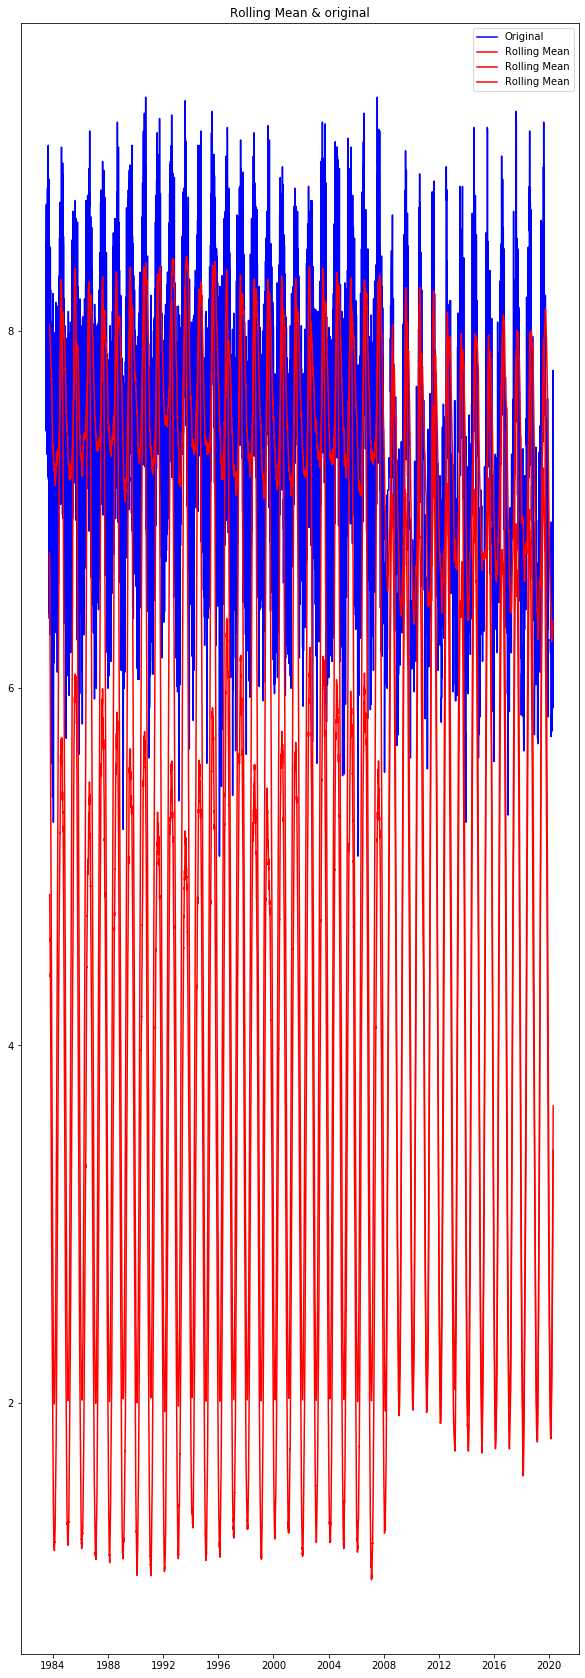

In [196]:
fig = plt.figure(figsize=(10,30))
plt.plot(pt_1_timeseries_ASK, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend()
plt.title('Rolling Mean & original')
plt.show(block=False)

In [48]:
data_minus_roll_mean = pt_1_timeseries - roll_mean

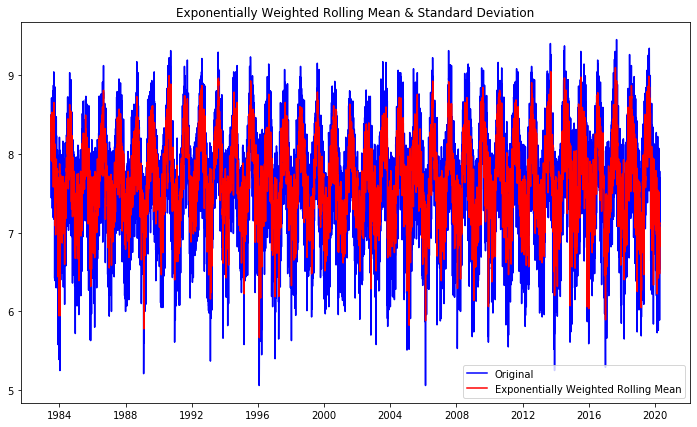

In [42]:
exp_roll_mean = pt_1_timeseries.ewm(halflife=2).mean()

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
orig = plt.plot(pt_1_timeseries, color='blue',label='Original')
mean = plt.plot(exp_roll_mean, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Exponentially Weighted Rolling Mean & Standard Deviation')
plt.show(block=False)

In [43]:
#differencing:one of the common techniques when dealing with both seasonality and trend
pt_1_timeseries_diff=pt_1_timeseries.diff(periods=1)

In [ ]:
#timeseriesdecomposition, another method to remove seasonality and trends 

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [45]:
pt_1_timeseries.head()

,ALLSKY_SFC_LW_DWN
Date,
1983-07-01,8.49
1983-07-02,8.15
1983-07-03,8.33
1983-07-04,8.34
1983-07-05,8.03


In [51]:
decomposition=seasonal_decompose(pt_1_timeseries['ALLSKY_SFC_LW_DWN'])

In [152]:
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(np.log(pt_1_timeseries))

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [93]:
#timeseriesmodeling

In [ ]:
We tried to analyse our time series data set in order to find patterns that help us make accurate predictions

In [ ]:
#basictimeseriesmodel

In [ ]:
#correlationandautocorrelation_series

In [59]:
pt_1_timeseries_diff =pt_1_timeseries.diff(periods=12)

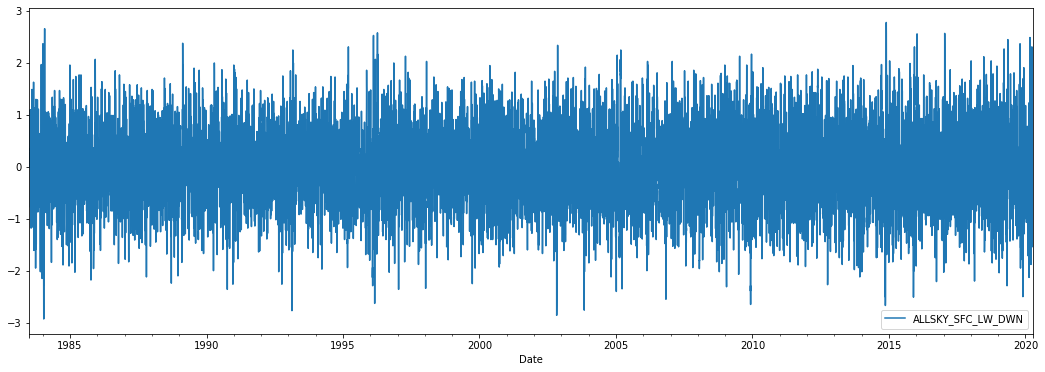

In [60]:
pt_1_timeseries_diff.plot(figsize=(18,6))

In [70]:
#autocorrelation
#lag-10-autocorrelation
pt_1_timeseries_lag_10=pt_1_timeseries.shift(369)
lag_10 = pd.concat([pt_1_timeseries,pt_1_timeseries_lag_10], axis=1)

lag_10.corr()

,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_LW_DWN
ALLSKY_SFC_LW_DWN,1.000000,0.365446
ALLSKY_SFC_LW_DWN,0.365446,1.000000


In [ ]:
#it will be good to have the autocorrelation for each lag , that's exactly what autocorrelation fonction does

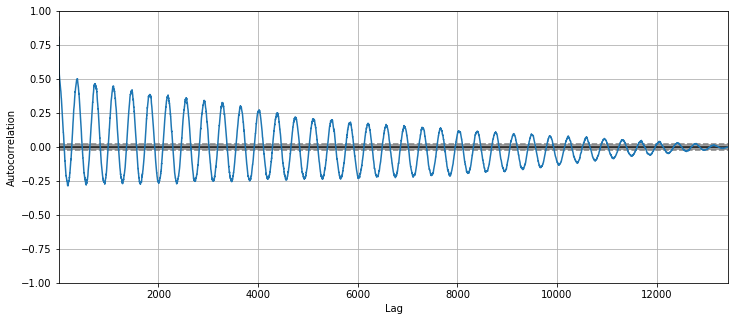

In [200]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(pt_1_timeseries_ASK)

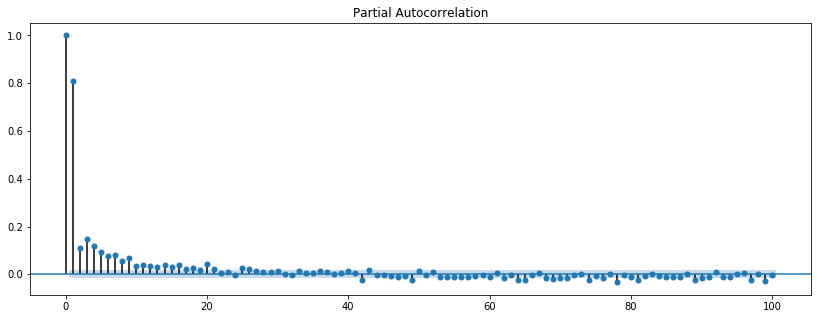

In [199]:
#The partial autocorrelation
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(pt_1_timeseries_ASK, lags=100);

In [198]:
pt_1_timeseries_ASK=pt_1_timeseries_ASK.asfreq('D')

In [86]:
# Import ARMA
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(pt_1_timeseries, order=(1,0))

In [72]:
# Fit the model to data
res_arma = mod_arma.fit()

In [73]:
# Print out summary information on the fit
print(res_arma.summary())

                              ARMA Model Results                              
Dep. Variable:      ALLSKY_SFC_LW_DWN   No. Observations:                13440
Model:                     ARMA(1, 0)   Log Likelihood               -9055.447
Method:                       css-mle   S.D. of innovations              0.475
Date:                Tue, 12 May 2020   AIC                          18116.894
Time:                        13:18:13   BIC                          18139.412
Sample:                    07-01-1983   HQIC                         18124.406
                         - 04-16-2020                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       7.6649      0.013    575.217      0.000       7.639       7.691
ar.L1.ALLSKY_SFC_LW_DWN     0.6928      0.006    111.377      0.000       0.681       0.705


## IV.Modeling:

In [205]:
#Plotting tools
import matplotlib.pyplot as plt


#Modeling
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX



#metrics and building my function
from math import sqrt
from numpy import mean
from numpy import median
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from sklearn.metrics import mean_squared_error


import warnings
warnings.filterwarnings('ignore')

How to train our models?
Generally in machine learning we split the data into train and test in order to see how well our model performs, but time series data is kind of special because it has an ordering. Thus we have to write a split function that maintains this ordering while taking a number of ordered observations. So we are not splitting our data by random but instead we leave the ordering and just take chunks of data for training and testing.
Generally in machine learning we split the data into train and test in order to see how well our model performs, but time series data is kind of special because it has an ordering. Thus we have to write a split function that maintains this ordering while taking a number of ordered observations. So we are not splitting our data by random but instead we leave the ordering and just take chunks of data for training and testing.

In [201]:
# split the train and test data, maintaining the order
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]

In [202]:
#split the data train an test datasets
train,test= train_test_split(pt_1_timeseries_ASK,4000)

In [206]:
def sarimax(train,test):
    predictions = []
    error = []
    model = SARIMAX(train,order=(1,0,0))
    res=model.fit()
    history = [x for x in train] #seed history with training data
      # walk forward
    for i in range(len(test)):
        model = SARIMAX(test,order=(1,0,0))
        res=model.fit()
        # fit model and make forecast for history
        yhat = res.predict()
        predictions.append(yhat) #store the forecast
        history.append(test[i]) #add it to history for next loop
    return predictions[0][1:]

In [ ]:
def graph(predictions,test,name):
    plt.figure(figsize=(12,8))
    plt.plot(predictions,label='Prediction')
    plt.plot(test,label='Actual')
    plt.legend(fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(name,fontsize=25)
    plt.xlabel('Date',fontsize=25)
    plt.ylabel('radiations',fontsize=25)

In [208]:
sarimax(train,test)

Date
2009-05-06    6.964491
2009-05-07    6.964491
2009-05-08    6.964491
2009-05-09    6.964491
2009-05-10    6.764649
                ...   
2020-04-12    6.265044
2020-04-13    5.885345
2020-04-14    6.275037
2020-04-15    7.773851
2020-04-16    7.773851
Freq: D, Length: 3999, dtype: float64

In [210]:
predictions=sarimax(train,test)
graph(predictions,test)

TypeError: graph() missing 1 required positional argument: 'name'

In [50]:
#These three distinct integer values, (p, d, q), are used to parametrize ARIMA models
p = d = q = range(0, 2)

In [ ]:
#We shall first generate small ranges of these parameters and use a "grid search" to iteratively explore different combinations of parameters.

In [51]:
# Generate all different combinations of p, d and q triplets
import itertools
pdq=list(itertools.product(p, d, q))

In [52]:
# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2],365) for x in list(itertools.product(p, d, q))]

In [ ]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        
            mod = sm.tsa.statespace.SARIMAX(pt_1_timeseries,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        
            

In [ ]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])

In [ ]:
ans_df.loc[ans_df['aic'].idxmin()]

The output of our code suggests that ARIMA(1, 1, 1)x(0,0,1, 12) yields the lowest AIC value of 17223.5. We should therefore consider this to be optimal option out of all the models we have considered.

Akaike Information Criterion:ich is provided by ARIMA models fitted using statsmodels library. The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection.

A model that fits the data very well while using lots of features will be assigned a larger AIC score than a model that uses fewer features to achieve the same goodness-of-fit. Therefore, we are interested in finding the model that yields the lowest AIC value. To achieve this, perform following 

## Fitting an ARIMA Time Series Model
Using grid search, we have identified the set of parameters that produces the best fitting model to our time series data. We can proceed to analyze this particular model in more depth.

In [81]:
pt_1_timeseries.shape

(13440, 1)

We'll start by plugging the optimal parameter values into a new SARIMAX model.

In [ ]:
# Plug the optimal parameter values into a new SARIMAX model
SARIMA_MODEL = sm.tsa.statespace.SARIMAX(pt_1_timeseries[:'2020-02-01'], 
                                        order=(0,0,1), 
                                        seasonal_order=(1, 1, 1,365), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = SARIMA_MODEL.fit()

print(output.summary().tables[1])

#Fitting an ARIMA Time Series Model:Using grid search, we have identified the set of parameters that produces the best fitting model to our time series data. We can proceed to analyze this particular model in more depth.
We'll start by plugging the optimal parameter values into a new SARIMAX model.

In [45]:
print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1692      0.017      9.909      0.000       0.136       0.203
ar.S.L1        0.3607      0.018     20.012      0.000       0.325       0.396
ma.S.L1       -0.9345      0.004   -254.815      0.000      -0.942      -0.927
sigma2         0.2095      0.002     84.856      0.000       0.205       0.214


The model returns a lot of information, but we'll focus only on the table of coefficients. The coef column above shows the importance of each feature and how each one impacts the time series patterns. The $P>|z|$ provides the significance of each feature weight.

For our time-series, we see that each weight has a p-value=0 but ma.S.L12, so it is to discussif it's a good idea  retain all of them in our model.



Next, we shall run model diagnostics to ensure that none of the assumptions made by the model have been violated.

Call the .plot_diagnostics() method on ARIMA output below:

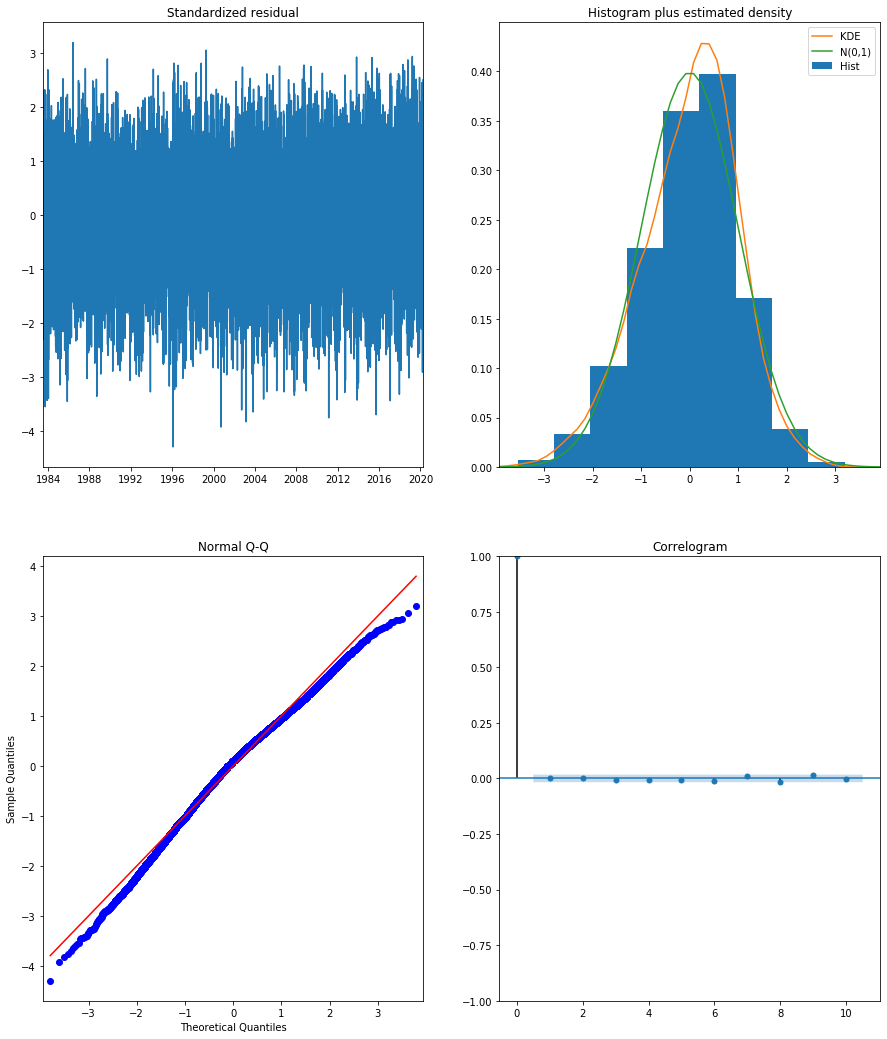

In [47]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

The purpose here is to ensure that residuals remain uncorrelated, normally distributed having zero mean. In the absence of these assumptions, we can not move forward and need further tweaking of the model.

Let's check for these assumptions from diagnostics plots.

In the top right plot, we see that the red KDE line follows closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed.

The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.

The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

These observations lead us to conclude that our model has no correlations and provides a satisfactory fit to help forecast future values.

# Validating the Model

### One-step Ahead Forecasting
In order to validate the model, we start by comparing predicted values to real values of the time series, which will help us understand the accuracy of our forecasts.

The .get_prediction() and .conf_int() methods allow us to obtain the values and associated confidence intervals for forecasts of the time series.

For get_predictions(), set the dynamic parameter to False to ensure that we produce one-step ahead forecasts, meaning that forecasts at each point are generated using the full history up to that point

In [63]:
pt_1_timeseries.tail()

,ALLSKY_SFC_LW_DWN
Date,
2020-04-12,5.89
2020-04-13,6.28
2020-04-14,7.78
2020-04-15,7.77
2020-04-16,7.08


In [50]:
# Get predictions starting from 2020-04-24 and calculate confidence intervals
pred_one_step_ahead = output.get_prediction(start=pd.to_datetime('2020-02-01'), dynamic=False)

In [75]:
pred_one_step_ahead.predicted_mean

Date
2020-02-01    7.919529
2020-02-02    7.215057
2020-02-03    7.098091
2020-02-04    6.767634
2020-02-05    7.687364
                ...   
2020-04-12    6.522449
2020-04-13    6.423834
2020-04-14    6.630737
2020-04-15    7.464261
2020-04-16    7.350710
Freq: D, Length: 76, dtype: float64

In [52]:
pred_conf = pred_one_step_ahead.conf_int()

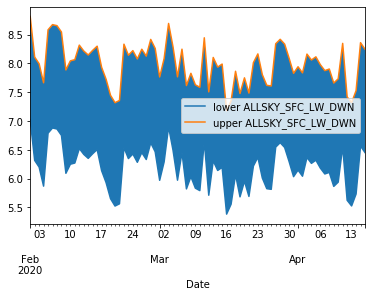

In [53]:
pred_conf.plot().fill_between(pred_conf.index,pred_conf.iloc[:,0],pred_conf.iloc[:,1],)

In [255]:
# Plot real vs predicted values along with confidence interval
rcParams['figure.figsize'] = 15, 6

NameError: name 'rcParams' is not defined

matplotlib.axes._subplots.AxesSubplot

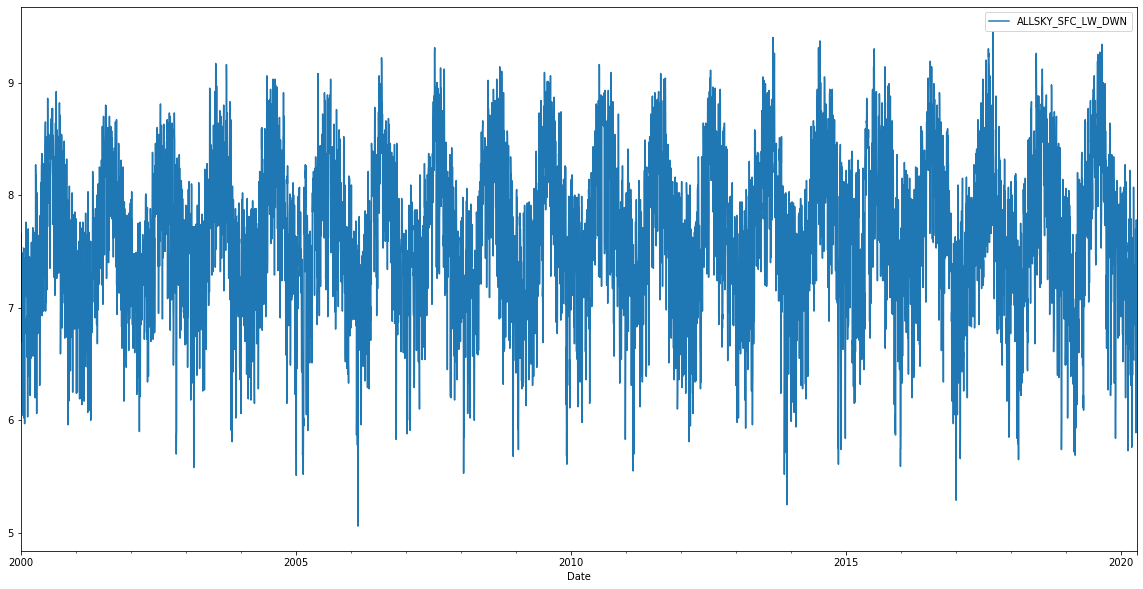

In [54]:
import matplotlib.pyplot
%matplotlib inline
type(pt_1_timeseries['2000':].plot(label='observed',figsize=(20,10)))

Matplotlib inline story:
Some people use matplotlib interactively from the python shell and have plotting windows pop up when they type commands. Some people run Jupyter notebooks and draw inline plots for quick data analysis. Others embed matplotlib into graphical user interfaces like wxpython or pygtk to build rich applications. Some people use matplotlib in batch scripts to generate postscript images from numerical simulations, and still others run web application servers to dynamically serve up graphs. To support all of these use cases, matplotlib can target different outputs, and each of these capabilities is called a backend; the "frontend" is the user facing code, i.e., the plotting code, whereas the "backend" does all the hard work behind-the-scenes to make the figure.

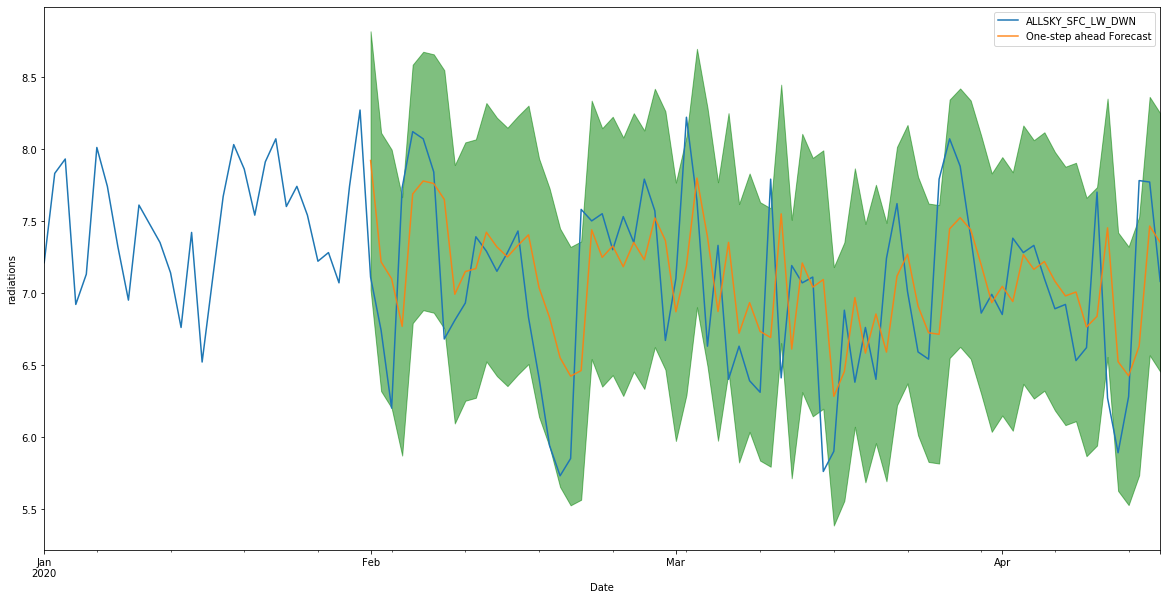

In [55]:
# Plot observed values
ax = pt_1_timeseries['2020':].plot(label='observed',figsize=(20,10))

# Plot predicted values
pred_one_step_ahead.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('radiations')
ax.legend()
ax.get_ylim
plt.show()

The forecasts align with the true values as seen above, with overall increase trend. We shall also check for the accuracy of our forecasts using MSE (Mean Squared Error). This will provide us with the average error of our forecasts. For each predicted value, we compute its distance to the true value and square the result. The results need to be squared so that positive/negative differences do not cancel each other out when we compute the overall mean.

In [71]:
# Get the real and predicted values
pt_1_timeseries_forecasted = pred.predicted_mean

In [73]:
pt_1_timeseries_truth = pt_1_timeseries['2020-02-01':]
np.array(pt_1_timeseries_truth)

array([[7.11],
       [6.74],
       [6.2 ],
       [7.73],
       [8.12],
       [8.07],
       [7.84],
       [6.68],
       [6.81],
       [6.93],
       [7.39],
       [7.29],
       [7.15],
       [7.28],
       [7.43],
       [6.83],
       [6.41],
       [5.94],
       [5.73],
       [5.85],
       [7.58],
       [7.5 ],
       [7.55],
       [7.3 ],
       [7.53],
       [7.35],
       [7.79],
       [7.57],
       [6.67],
       [7.1 ],
       [8.22],
       [7.64],
       [6.63],
       [7.33],
       [6.4 ],
       [6.63],
       [6.39],
       [6.31],
       [7.79],
       [6.41],
       [7.19],
       [7.07],
       [7.11],
       [5.76],
       [5.9 ],
       [6.88],
       [6.38],
       [6.76],
       [6.4 ],
       [7.24],
       [7.62],
       [7.01],
       [6.59],
       [6.54],
       [7.79],
       [8.07],
       [7.88],
       [7.39],
       [6.86],
       [6.99],
       [6.85],
       [7.38],
       [7.28],
       [7.33],
       [7.1 ],
       [6.89],
       [6.

In [74]:
# Compute the mean square error
mse = ((np.array(pt_1_timeseries_forecasted) - np.array(pt_1_timeseries_truth)) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.51


The MSE of our one-step ahead forecasts yields a value of 0.51, which is very low. An MSE this close to 0 indicates that the estimator is predicting observations of the parameter with perfect accuracy, which would be an ideal scenario but it is not typically possible.

### Dynamic forecasting

In [95]:
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('2020-02-01'), dynamic=False, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

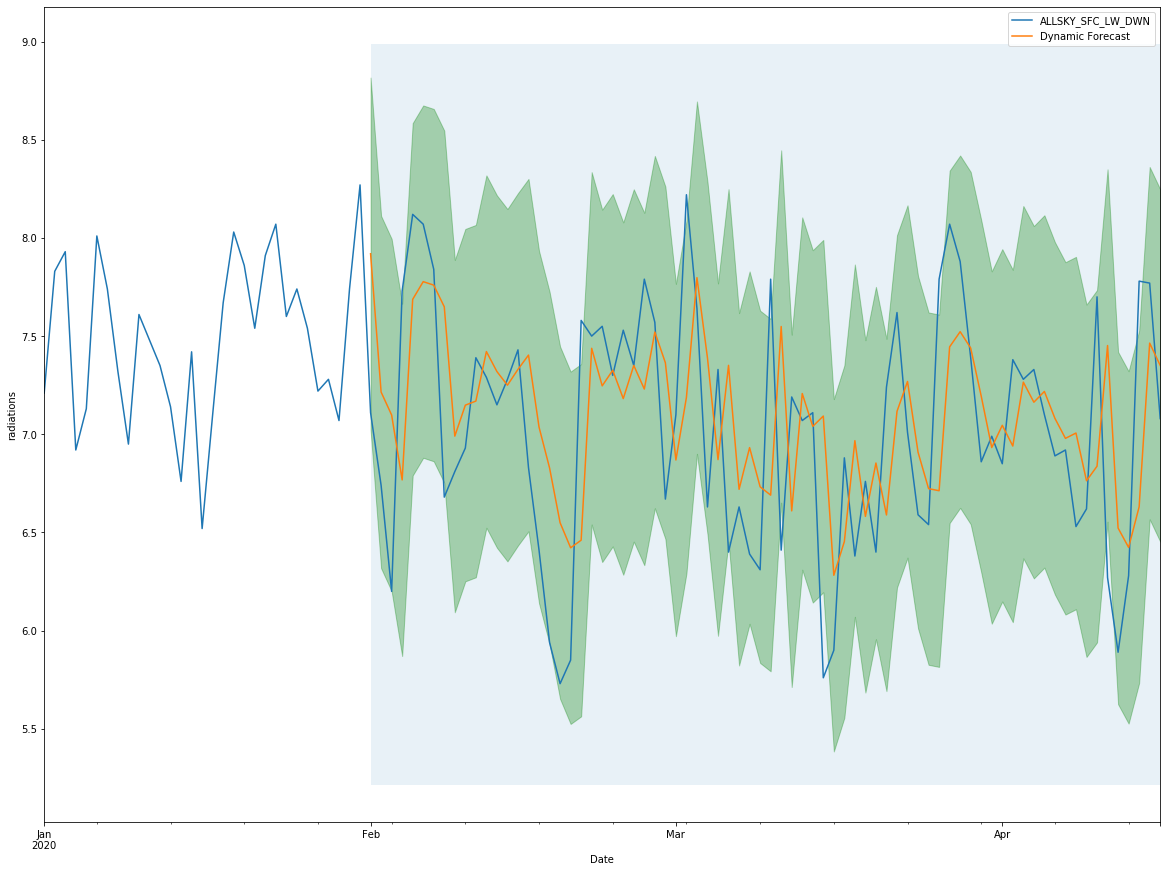

In [96]:
# Plot the dynamic forecast with confidence intervals.
pt_1_timeseries_forecasted = pred_dynamic.predicted_mean
ax = pt_1_timeseries['2020':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2020-02-01'), pt_1_timeseries_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('radiations')

plt.legend()
plt.show()

In [ ]:
Once again, we quantify the predictive performance of our forecasts by computing the MSE.

In [98]:
# Extract the predicted and true values of our time series
pt_1_timeseries_forecasted = pred_dynamic.predicted_mean
pt_1_timeseries_truth = pt_1_timeseries['2020-02-01':]
# Compute the mean square error
mse = ((np.array(pt_1_timeseries_forecasted) - np.array(pt_1_timeseries_truth)) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.66


The predicted values obtained from the dynamic forecasts yield an MSE of 1.01. This is slightly higher than the one-step ahead, which is to be expected given that we are relying on less historical data from the time series.

Both the one-step ahead and dynamic forecasts confirm that this time series model is valid. However, much of the interest around time series forecasting is the ability to forecast future values way ahead in time.

In [ ]:
#Producing and Visualizing Forecasts

We will now describe how to leverage our seasonal ARIMA time series model to forecast future values. The .get_forecast() method of our time series output can compute forecasted values for a specified number of steps ahead.

In [77]:
# Get forecast 500 steps ahead in future
prediction = output.get_forecast(steps=10,dynamic=True)
np.array(prediction)

array(<statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper object at 0x1349b90d0>,
      dtype=object)

In [78]:
#prediction =output.get_prediction(start=pd.to_datetime('2020-02-01'),end='2020-09-01',dynamic=True, full_results=True)
# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

In [79]:
pt_1_timeseries['2020':]

,ALLSKY_SFC_LW_DWN
Date,
2020-01-01,7.21
2020-01-02,7.83
2020-01-03,7.93
2020-01-04,6.92
2020-01-05,7.13
...,...
2020-04-12,5.89
2020-04-13,6.28
2020-04-14,7.78


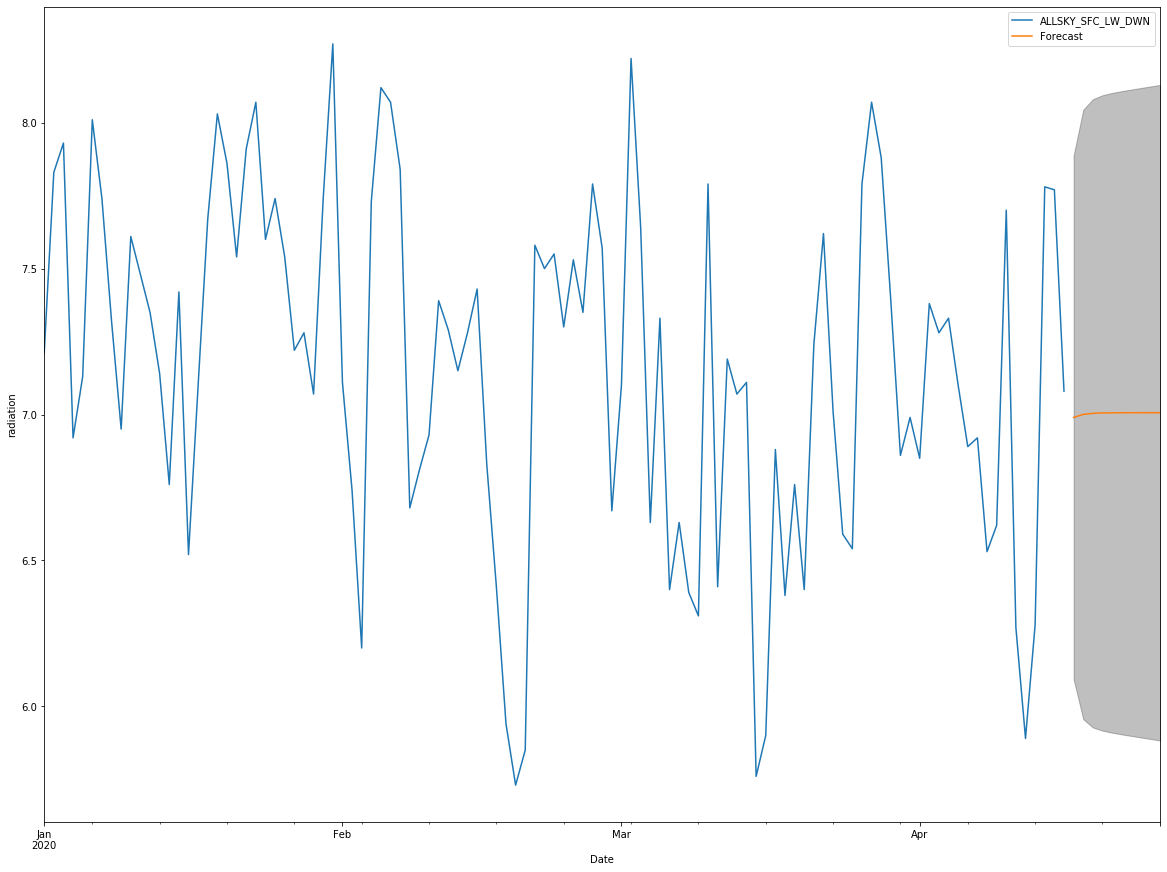

In [80]:
# Plot future predictions with confidence intervals
ax = pt_1_timeseries['2020':].plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('radiation')

plt.legend()
plt.show()

Both the forecasts and associated confidence interval that we have generated can now be used to further understand the time series and foresee what to expect. Our forecasts show that the time series is expected to continue increasing at a steady pace.

As we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.

## Going through step by step

In [ ]:
Enter time series. A time series is simply a series of data points ordered in time. In a time series, time is often the independent variable and the goal is usually to make a forecast for the future.
However, there are other aspects that come into play when dealing with time series.
Is it stationary?
Is there a seasonality?
Is the target variable autocorrelated?

In [ ]:
n this post, I will introduce different characteristics of time series and how we can model them to obtain accurate (as much as possible) forecasts.

Autocorrelation
Informally, autocorrelation is the similarity between observations as a function of the time lag between them.

Seasonality
Seasonality refers to periodic fluctuations. For example, electricity consumption is high during the day and low during night, or online sales increase during Christmas before slowing down again.


Remember that seasonality can also be derived from an autocorrelation plot if it has a sinusoidal shape. Simply look at the period, and it gives the length of the season.

Stationarity
Ideally, we want to have a stationary time series for modelling. Of course, not all of them are stationary, but we can make different transformations to make them stationary.

How to test if a process is stationary
You may have noticed in the title of the plot above Dickey-Fuller. This is the statistical test that we run to determine if a time series is stationary or not.
Without going into the technicalities of the Dickey-Fuller test, it test the null hypothesis that a unit root is present.
If it is, then p > 0, and the process is not stationary.
Otherwise, p = 0, the null hypothesis is rejected, and the process is considered to be stationary.
As an example, the process below is not stationary. Notice how the mean is not constant through time.

In [ ]:
Modelling time series
Moving average
The moving average model is probably the most naive approach to time series modelling. This model simply states that the next observation is the mean of all past observations.
Although this model might be a good starting point.

In [ ]:
Otherwise, the moving average can be used to identify interesting trends in the data. We can define a window to apply the moving average model to smooth the time series, and highlight different trends.Of course, the longer the window, the smoother the trend will be. Below is an example of moving average on a smaller window.

In [ ]:
Exponential smoothing
Exponential smoothing uses a similar logic to moving average, but this time, a different decreasing weight is assigned to each observations. In other words, less importance is given to observations as we move further from the present.

In [ ]:
Here, alpha is a smoothing factor that takes values between 0 and 1. It determines how fast the weight decreases for previous observations.

In [ ]:
the smaller the smoothing factor, the smoother the time series will be. This makes sense, because as the smoothing factor approaches 0, we approach the moving average model.

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from tqdm import tqdm_notebook

from itertools import product

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

pt_1_timeseries.head(10)

,ALLSKY_SFC_LW_DWN
Date,
1983-07-01,8.49
1983-07-02,8.15
1983-07-03,8.33
1983-07-04,8.34
1983-07-05,8.03
1983-07-06,8.17
1983-07-07,7.99
1983-07-08,7.44
1983-07-09,7.99


In [ ]:
Moving average
Let’s use the moving average model to smooth our time series. For that, we will use a helper function that will run the moving average model on a specified time window and it will plot the result smoothed curve:

In [106]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

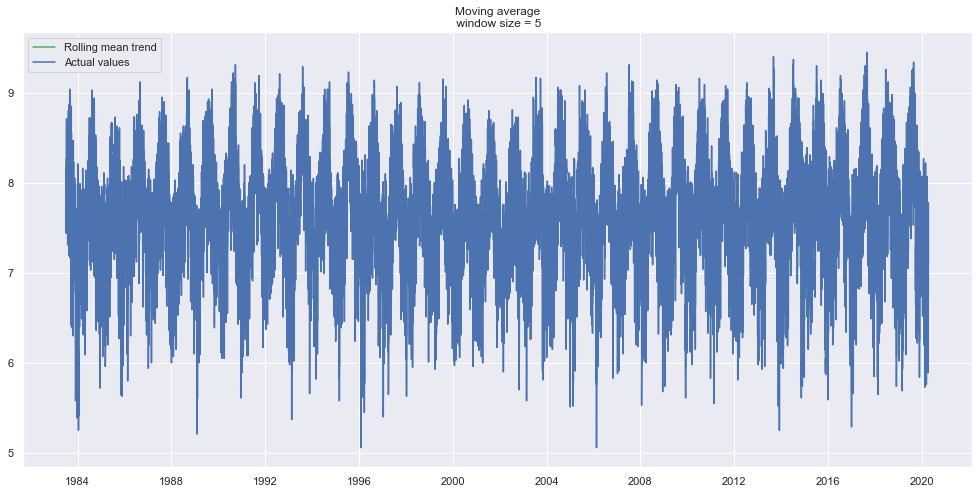

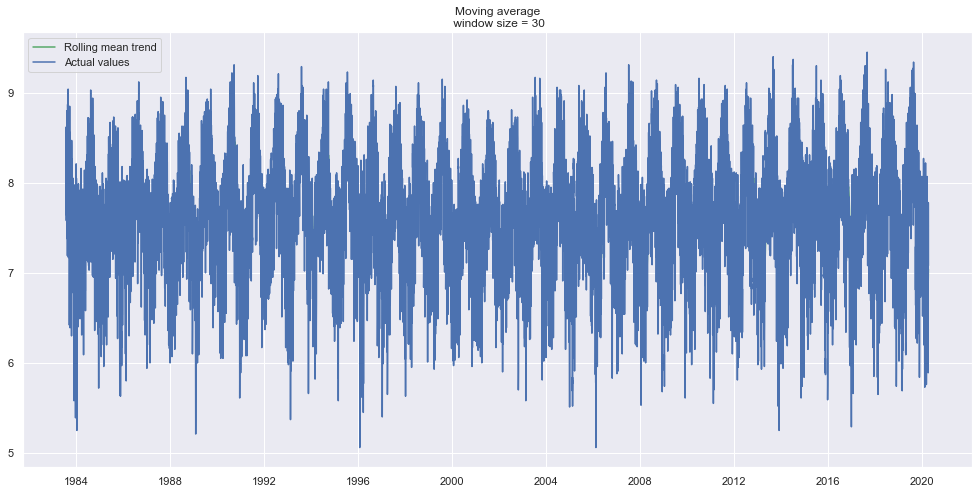

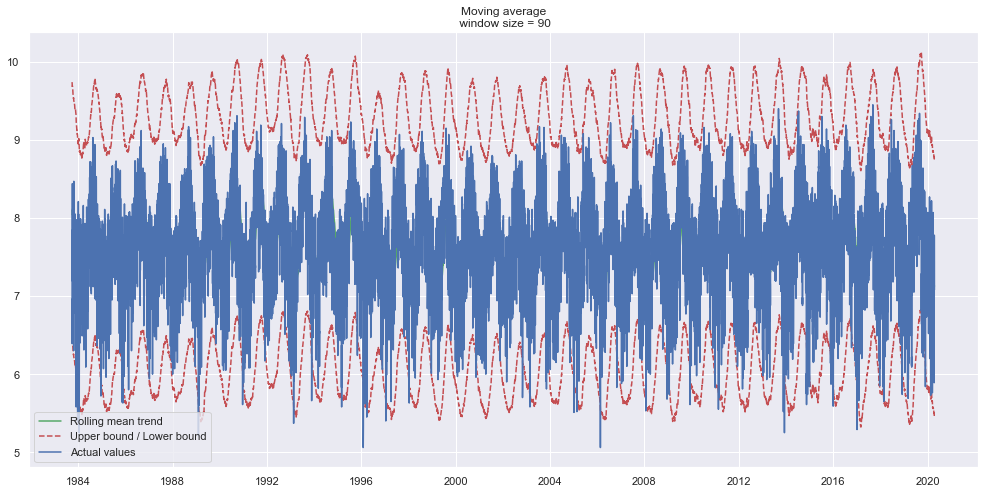

In [107]:
#Smooth by the previous 7 days (by week)
plot_moving_average(pt_1_timeseries, 5)

#Smooth by the previous month (30 days)
plot_moving_average(pt_1_timeseries, 30)

#Smooth by previous quarter (90 days)
plot_moving_average(pt_1_timeseries, 90, plot_intervals=True)

In [ ]:
#exponential smoothing

In [110]:
def exponential_smoothing(series, alpha):

    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result
  
def plot_exponential_smoothing(series, alphas):
 
    plt.figure(figsize=(20,10))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);

plot_exponential_smoothing(pt_1_timeseries, [0.05, 0.3])

KeyError: 0

<Figure size 1440x720 with 0 Axes>

In [ ]:
def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

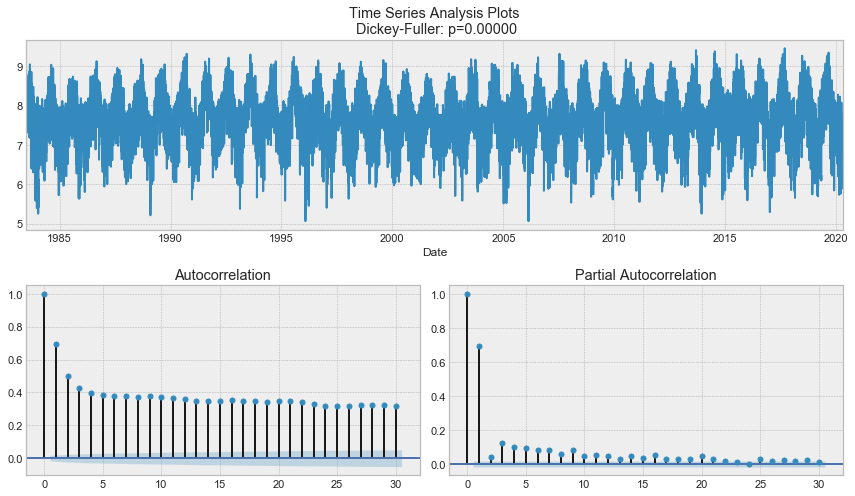

In [114]:
tsplot(pt_1_timeseries['ALLSKY_SFC_LW_DWN'],lags=30)

In [117]:
# Take the first difference to remove to make the process stationary
data_diff = pt_1_timeseries - pt_1_timeseries.shift(1)
data_diff

,ALLSKY_SFC_LW_DWN
Date,
1983-07-01,NaN
1983-07-02,-0.34
1983-07-03,0.18
1983-07-04,0.01
1983-07-05,-0.31
...,...
2020-04-12,-0.38
2020-04-13,0.39
2020-04-14,1.50


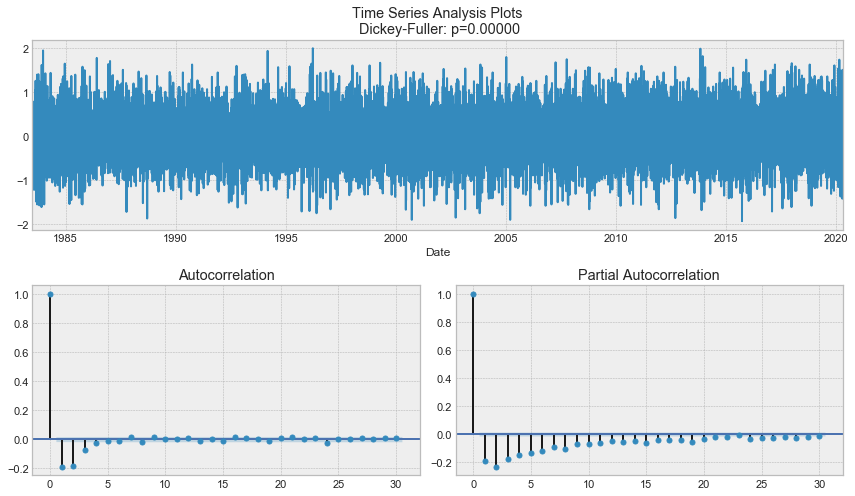

In [120]:
tsplot(data_diff['ALLSKY_SFC_LW_DWN'][1:], lags=30)

In [121]:
#Set initial values and some bounds
ps = range(0, 5)
d = 1
qs = range(0, 5)
Ps = range(0, 5)
D = 1
Qs = range(0, 5)
s = 5

In [122]:
#Create a list with all possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)


625

In [ ]:
#Train many SARIMA models to find the best set of parameters
def optimize_SARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
    """
    
    results = []
    best_aic = float('inf')
    
    for param in tqdm_notebook(parameters_list):
        try: model = sm.tsa.statespace.SARIMAX(pt_1_timeseries['ALLSKY_SFC_LW_DWN'], order=(param[0], d, param[1]),
                                               seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        
        #Save best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])
        
    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    #Sort in ascending order, lower AIC is better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

In [ ]:
#Prophet
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as pl

In [ ]:

# Import Prophet
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

# Change the column names according to Prophet's guidelines
pt_.reset_index()
df.columns = ['ds', 'y']
df.head()

# Split into a train/test set
prediction_size = 30
train_df = df[:-prediction_size]

# Initialize and train a model
m = Prophet()
m.fit(train_df)

# Make predictions
future = m.make_future_dataframe(periods=prediction_size)
forecast = m.predict(future)
forecast.head()

# Plot forecast
m.plot(forecast)

# Plot forecast's components
m.plot_components(forecast)

# Evaluate the model
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

cmp_df = make_comparison_dataframe(df, forecast)
cmp_df.head()

In [341]:
pip install plotly

     |████████████████████████████████| 7.2MB 3.2MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11429 sha256=bdb4cd58005bb5c44ef0d9c9d32a37ad92e505ad045b866f5f6d268b7470f69a
  Stored in directory: /Users/yasserelhari/Library/Caches/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [1]:
import plotly
# Authenticate with your account
plotly.tools.set_credentials_file(username='YasserEl',                                              
                                  api_key='Chicago2019@')

AttributeError: module 'plotly.tools' has no attribute 'set_credentials_file'